# Visualization of Dataset for Closed-Loop-Hackathon (CLH)

In [60]:
import os
import sys
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [49]:
DIR_DATA = '/net/projects/scratch/winter/valid_until_31_July_2020/hackathon/datasets'
DIR_SAVE = '../data'
def files(path, end_string=""):
    """
    Iterator for getting a files that end with supplied end_string. Does not show folders.
    
    Args:
        path          Path to directory to look for files in
        end_string    String ending of file name. Default is empty --> Show everything
    """
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)) and file.endswith(end_string):
            yield file
f_list = [f for f in files(DIR_DATA, end_string=".csv")]

In [26]:
colnames = ['time', 'trip', 'profile']
data_frames = {}
for indx_f, f in enumerate(f_list):
    df = pd.read_csv(DIR_DATA + '/' + f, names=colnames, header=None)
    data_frames[indx_f] = (f, df)fn, df = data_frames[0]
print(fn)
print(df.head())
def generate_windows(ts, wl, sliding=False, slide_factor=0.4):
    """
    Function that generates multiple time windows for a given time series
    
    Args:
        ts                  time series
        wl                  length of windows in steps
        sliding             boolean deciding whether to do sliding or not
        slide_factor        procentual amount of windowns length used to do the slide with
    """
    if(sliding):
        slide = int(wl*slide_factor)
        nr_w = int(np.ceil((len(ts)-wl)/slide)) + 1
        windows = np.zeros((nr_w, wl))
        for w_indx in range(nr_w-1):
            windows[w_indx,:] = ts[w_indx*slide:w_indx*slide + wl]
        windows[-1,:] = ts[-wl:]    
    
    else:
        nr_w = int(np.ceil(len(ts)/wl))
        windows = np.zeros((nr_w, wl))
        for w_indx in range(nr_w-1):
            windows[w_indx,:] = ts[w_indx*wl:(w_indx+1)*wl]
        windows[-1,:] = ts[-wl:]    
    
    return windows

def test_sliding(ts, windows):
    print("TESTING")
    plt.figure("Original")
    plt.plot(ts)
    plt.show()
    for i, w in enumerate(windows):
        print(i)
        
        plt.figure(i)
        plt.plot(w)
        plt.show()
    plt.show()
        
    

windows = generate_windows(df.profile, wl=500000, sliding=True)
test_sliding(df.profile, windows)
    
    #df.plot(x='time', y='profile')
    #TODO get the k out of the title

#plt.show()

ts1_1_k_3.0.csv
      time  trip   profile
0  0.00000   0.0 -0.000066
1  0.00005  -0.0 -0.000066
2  0.00010  -0.0 -0.000066
3  0.00015  -0.0 -0.000066
4  0.00020  -0.0 -0.000066
TESTING


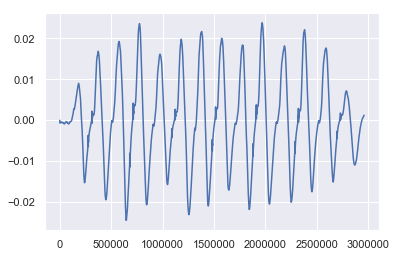

0


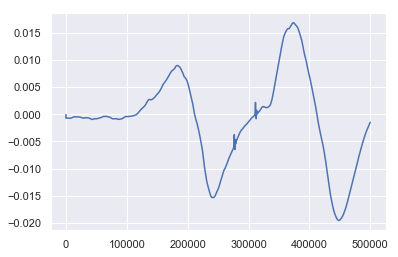

1


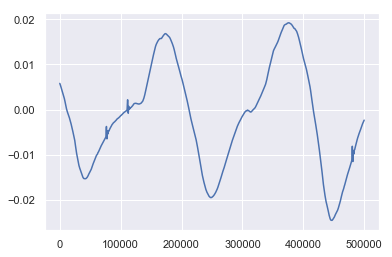

2


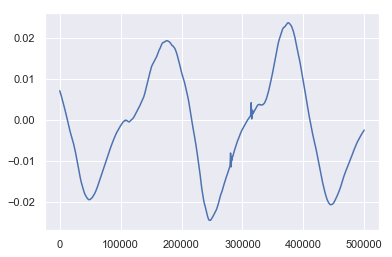

3


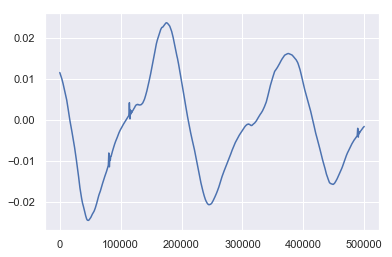

4


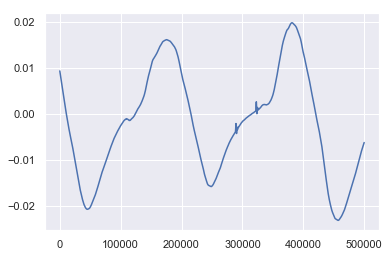

5


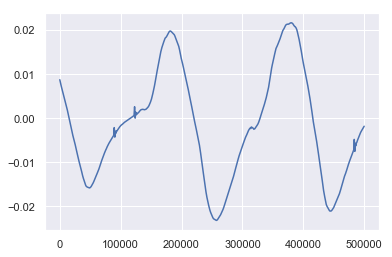

6


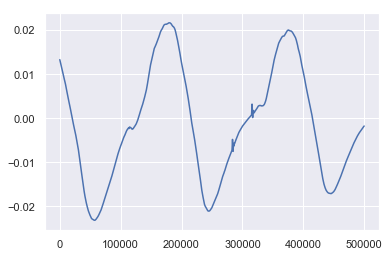

7


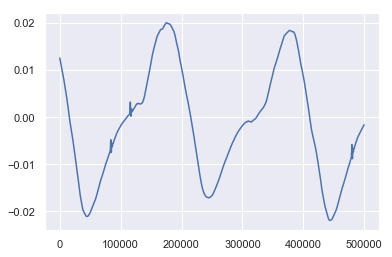

8


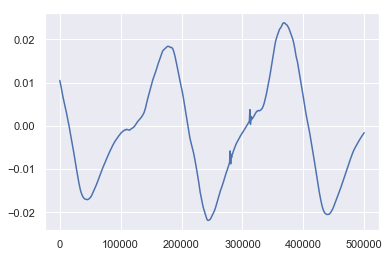

9


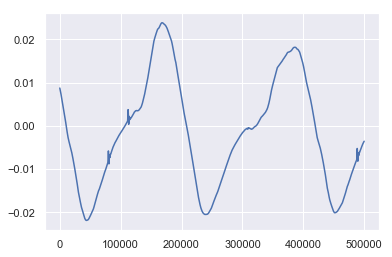

10


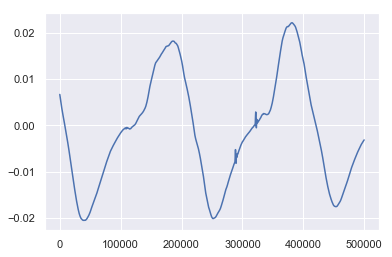

11


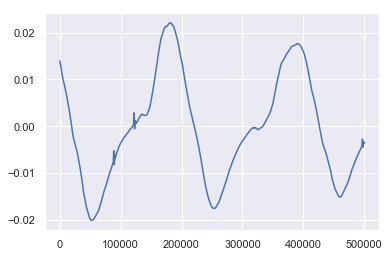

12


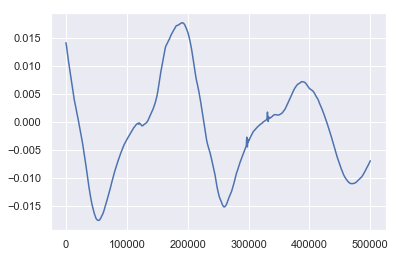

13


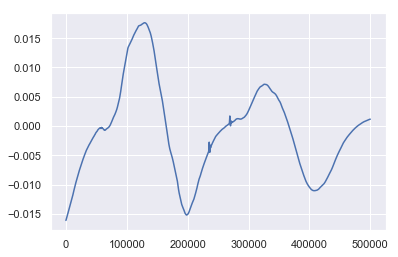

In [51]:
fn, df = data_frames[0]
print(fn)
print(df.head())
def generate_windows(ts, wl, sliding=False, slide_factor=0.4):
    """
    Function that generates multiple time windows for a given time series
    
    Args:
        ts                  time series
        wl                  length of windows in steps
        sliding             boolean deciding whether to do sliding or not
        slide_factor        procentual amount of windowns length used to do the slide with
    """
    if(sliding):
        slide = int(wl*slide_factor)
        nr_w = int(np.ceil((len(ts)-wl)/slide)) + 1
        windows = np.zeros((nr_w, wl))
        for w_indx in range(nr_w-1):
            windows[w_indx,:] = ts[w_indx*slide:w_indx*slide + wl]
        windows[-1,:] = ts[-wl:]    
    
    else:
        nr_w = int(np.ceil(len(ts)/wl))
        windows = np.zeros((nr_w, wl))
        for w_indx in range(nr_w-1):
            windows[w_indx,:] = ts[w_indx*wl:(w_indx+1)*wl]
        windows[-1,:] = ts[-wl:]    
    
    return windows

def test_sliding(ts, windows):
    print("TESTING")
    plt.figure("Original")
    plt.plot(ts)
    plt.show()
    for i, w in enumerate(windows):
        print(i)
        
        plt.figure(i)
        plt.plot(w)
        plt.show()
    plt.show()
        
    

windows = generate_windows(df.profile, wl=500000, sliding=True)
test_sliding(df.profile, windows)

In [68]:
fn, df = data_frames[0]
print(fn)
print(df.head())
def generate_windows(ts, wl, fn, sliding=False, slide_factor=0.4):
    """
    Function that generates multiple time windows for a given time series. Furthermore
    saves them as json files.
    
    Args:
        ts                  time series
        wl                  length of windows in steps
        fn                  file_name
        sliding             boolean deciding whether to do sliding or not
        slide_factor        procentual amount of windowns length used to do the slide with
    """
    if(sliding):
        slide = int(wl*slide_factor)
        nr_w = int(np.ceil((len(ts)-wl)/slide)) + 1
        windows = []
        for w_indx in range(nr_w-1):
            windows.append(ts[w_indx*slide:w_indx*slide + wl])
        windows.append(ts[-wl:])    
    
    else:
        nr_w = int(np.ceil(len(ts)/wl))
        windows = []
        for w_indx in range(nr_w-1):
            windows.append(ts[w_indx*wl:(w_indx+1)*wl])
        windows.append(ts[-wl:])
        
    json_dictionary = {}
    json_dictionary['windows_length'] = wl
    json_dictionary['windows_nr'] = nr_w
    if sliding:
        json_dictionary['sliding_length'] = slide
        json_dictionary['slide_factor'] = slide_factor
    json_dictionary['file_name'] = fn
    json_dictionary['data_frames'] = windows
    
    save_as_pickle(json_df = pd.read_csv(DIR_DATA + '/' + f, names=colnames, header=None)dictionary, "test")
    
    
    return windows

def save_as_pickle(dictionary, file_name, path='../data'):
    """
    Save a dictionary as a pickle file.
    
    Args:
        dictionary             dicationary to be pickled
        file_name              name of the pickled file (no extension)
        path                   path of where the file is to be stored
    """
    with open(path + '/' + file_name + '.pickle', 'wb') as handle:
        pickle.dump(dictionary, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("[+] saved dictionary in {}!".format(path + '/' + file_name + '.pickle'))

    
def load_pickle(file_path):
    """
    Loads a pickle file.
    
    Args:
        file_path              path to file to be depickled
    
    Returns:
        window length
        window number
        file name
        list of windows
        sliding length (only if sliding was used, else None)
        sliding factor (only if sliding was used, else None)
    """
    with open(file_path, 'rb') as handle:
        df = pickle.load(handle)df = pd.read_csv(DIR_DATA + '/' + f, names=colnames, header=None)
    print("[+] loaded dictionary from {}!".format(file_path))
    
    if 'slide_factor' in df.keys():
        return_tuple = (df['windows_length'], df['windows_nr'], df['file_name'], 
                df['data_frames'], df['sliding_length'], df['slide_factor'])
    else:
        return_tuple = (df['windows_length'], df['windows_nr'], df['file_name'], 
                df['data_frames'], None, None)
    
    return return_tuple
        

def test_sliding(ts, windows):
    print("TESTING")
    plt.figure("Original")
    ts.plot(x="time", y="profile")
    plt.show()
    for i, w in enumerate(windows):
        print(i)
        w.plot(x="time", y="profile")
        plt.show()
    plt.show()
        
    

windows = generate_windows(df, wl=500000, fn=fn, sliding=False)
#test_sliding(df, windows)
a,b,c,d,e,f = load_pickle("../data/test.pickle")
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)

ts1_1_k_3.0.csv
      time  trip   profile
0  0.00000   0.0 -0.000066
1  0.00005  -0.0 -0.000066
2  0.00010  -0.0 -0.000066
3  0.00015  -0.0 -0.000066
4  0.00020  -0.0 -0.000066
[+] saved dictionary in ../data/test.pickle!
[+] loaded dictionary from ../data/test.pickle!
500000
6
ts1_1_k_3.0.csv
[            time     trip   profile
0        0.00000    0.000 -0.000066
1        0.00005   -0.000 -0.000066
2        0.00010   -0.000 -0.000066
3        0.00015   -0.000 -0.000066
4        0.00020   -0.000 -0.000066
5        0.00025   -0.000 -0.000066
6        0.00030   -0.000 -0.000066
7        0.00035   -0.000 -0.000066
8        0.00040   -0.000 -0.000066
9        0.00045   -0.000 -0.000066
10       0.00050   -0.000 -0.000066
11       0.00055   -0.000 -0.000066
12       0.00060   -0.000 -0.000066
13       0.00065   -0.000 -0.000066
14       0.00070   -0.000 -0.000066
15       0.00075   -0.000 -0.000066
16       0.00080   -0.000 -0.000066
17       0.00085   -0.000 -0.000066
18       0.00090   